# Optimalisasi Biaya Pemasaran

Departemen analitik perusahaan Y.Afisha ingin mengetahui berapa banyak uang yang harus diinvestasikan dan ke mana saja uang tersebut harus diinvestasikan, supaya perusahaan ini dapat mengoptimalkan anggaran biaya pemasaran.

Kita perlu mempelajari kapan para pengguna menggunakan produk Y.Afisha dan kapan mulai melakukan pembelian. Selain itu, kita juga perlu mempelajari jumlah uang yang disumbangkan oleh setiap pengguna dan kapan semua biaya pemasaran terbayarkan.

Saat ini, kita memiliki log atau catatan server yang memuat data kunjungan ke situs Y.Afisha dari bulan Januari 2017 hingga bulan Desember 2018, file dump yang memuat semua pesanan untuk periode tersebut, serta statistik biaya pemasaran.


**KONTEN**

* [Pendahuluan]
* [Tahap 1. Eksplorasi Data]
    * [1.1 Inisialisasi]
    * [1.2 Memuat Data]
    * [1.3 Mempersiapkan Data]
    * [1.4 Kesimpulan dan Langkah Selanjutnya]
* [Tahap 2. Pra-pemrosesan Data]   
    * [2.1 Data Kunjungan]
        * [2.1.1 Memperbaiki Gaya Penulisan]
        * [2.1.2 Memperbaiki Tipe Data]
        * [2.1.3 Memperbaiki Data Anomali]
    * [2.2 Data Pesanan]
        * [2.2.1 Memperbaiki Gaya Penulisan]
        * [2.2.2 Memperbaiki Tipe Data]
    * [2.3 Data Pengeluaran Pemasaran]
        * [2.3.1 Memperbaiki Tipe Data]
    * [2.4 Kesimpulan dan Langkah Selanjutnya]
* [Tahap 3. Analisa Data]
    * [3.1 Penghitungan Metrik Berdasarkan Produk]
        * [3.1.1 Jumlah Orang yang Menggunakan Produk Setiap Hari, Minggu, dan Bulan]
        * [3.1.2 Jumlah Sesi Per Hari]
        * [3.1.3 Lama Durasi untuk Setiap Sesi]
        * [3.1.4 Seberapa Sering Pengguna Kembali Menggunakan Produk]
    * [3.2 Penghitungan Metrik Berdasarkan Penjualan]
        * [3.2.1 Kapan Orang-orang Mulai Melakukan Pembelian?]
        * [3.2.2 Jumlah Pesanan yang Dibuat Selama Periode Waktu Tertentu]
        * [3.2.3 Besaran Rata-rata Pembelian]
        * [3.2.4 Jumlah LTV]
    * [3.3 Penghitungan Metrik Berdasarkan Pemasaran]
        * [3.3.1 Jumlah Uang yang Dihabiskan]
        * [3.3.2 Biaya Akuisisi Pelanggan dari Masing-masing Sumber]
        * [3.3.3 ROI]
* [Kesimpulan Umum]

## Pendahuluan

Dalam proyek kali ini, kita akan mempelajari dan menganalisis data mengenai sesi pengguna, pemasaran dan penjualan produk perusahaan Y.Afisha supaya kita dapat mengetahui sumber/platform mana saja yang efektif sehingga perusahaan ini dapat mengoptimalkan biaya pemasaran.

### Tujuan:



### Tahapan
Kumpulan data yang kita miliki terbagi dalam tiga dataset, yaitu:

1. Data mengenai kunjungan disimpan pada file `/datasets/visits_log_us.csv`
2. Data mengenai pesanan disimpan pada file `/datasets/orders_log_us.csv`
3. Data mengenai pengeluaran disimpan pada file `/datasets/costs_us.csv`

Pertama, karena tidak ada informasi terkait kualitas data tersebut, kita perlu memeriksanya terlebih dahulu sebelum menguji hipotesis. Kita akan melakukan pra-pemrosesan data, dan mencoba mengatasi masalah yang muncul pada data tersebut, seperti nilai yang hilang, duplikasi, dan sebagainya. Kemudian, kita akan menghitung metrik berdasarkan produk, penjualan, dan pemasaran.  Terakhir, kita akan menguji hipotesis dan menarik kesimpulan berdasarkan data yang sudah diproses.
 
Proyek ini akan terdiri dari tiga tahap:
 1. Ikhtisar Data
 2. Pra-pemrosesan Data
 3. Analisa Data

## Eksplorasi Data

### Inisialisasi

In [404]:
from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

### Memuat Data

In [405]:
df_visits = pd.read_csv('/datasets/visits_log_us.csv')
df_orders = pd.read_csv('/datasets/orders_log_us.csv')
df_costs = pd.read_csv('/datasets/costs_us.csv')

### Mempersiapkan Data

**Deskripsi Data**

Tabel `visits` (log/catatan server yang memuat data kunjungan ke situs web):

 * Uid — ID pengguna
 * Device —perangkat pengguna
 * Start Ts — tanggal dan waktu dimulainya sesi
 * End Ts — tanggal dan waktu berakhirnya sesi
 * Source Id — ID sumber iklan, sumber yang digunakan pengguna untuk datang ke situs web

Semua tanggal dalam tabel ini menggunakan format YYYY-MM-DD.

Tabel `orders` (data terkait pesanan):

 * Uid — ID pengguna yang membuat pesanan
 * Buy Ts — tanggal dan waktu pesanan dibuat
 * Revenue — pendapatan Y.Afisha dari pesanan tersebut

Tabel `costs` (data terkait pengeluaran pemasaran):

 * source_id — ID sumber iklan
 * dt — tanggal
 * costs — pengeluaran untuk sumber iklan pada tanggal tersebut

In [406]:
df_visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [407]:
df_visits.shape

(359400, 5)

In [408]:
df_orders.head(10)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [409]:
df_orders.shape

(50415, 3)

In [410]:
df_costs.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [411]:
df_costs.shape

(2542, 3)

### Kesimpulan dan Langkah Selanjutnya

Data yang kita miliki terbagi dalam tiga tabel:

1. Tabel `visits` menyimpan data mengenai kunjungan ke situs web. Memiliki 359400 baris dan 5 kolom.
2. Tabel `orders` menyimpan data terkait pesanan. Memiliki 50415 baris dan 3 kolom.
3. Tabel `costs` berisi data terkait pengeluaran pemasaran. Memiliki 2542 baris dan 3 kolom.

Untuk melanjutkan analisis, kita perlu melakukan pra-pemrosesan data terhadap masing - masing tabel terlebih dahulu.

## Pra-Pemrosesan Data

### Data Kunjungan

In [412]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [413]:
df_visits.isna().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [414]:
df_visits.duplicated().sum()

0

In [415]:
df_visits[df_visits['Start Ts'] > df_visits['End Ts']]

,Device,End Ts,Source Id,Start Ts,Uid
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453


Tabel `visits` tidak memiliki nilai yang hilang maupun data yang terduplikasi, namun beberapa kolom memiliki masalah, seperti:

 * kolom `End Ts` dan `Start Ts` tipe datanya seharusnya adalah datetime, bukan object.
 * Nama kolom menggunakan huruf kapital dan nama kolom yang terdiri dari dua kata tidak menggunakan gaya penulisan *snake_case* 
 
Selain itu, terdapat data yang tidak sesuai, yaitu dimana waktu dimulainya sesi (`Start Ts`) lebih lama dibandingkan waktu berakhirnya (`End Ts`). Karena jumlah data bermasalah ini hanya sedikit, maka akan kita hapus.

#### Memperbaiki Gaya Penulisan

In [416]:
df_visits = df_visits.rename(
    columns = {
        'Device' : 'device',
        'End Ts' : 'end_ts',
        'Source Id' : 'source_id',
        'Start Ts' : 'start_ts',
        'Uid' : 'uid'
    }
)

In [417]:
df_visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

#### Memperbaiki Tipe Data

In [418]:
df_visits['end_ts'] = pd.to_datetime(df_visits['end_ts'])

In [419]:
df_visits['start_ts'] = pd.to_datetime(df_visits['start_ts'])

In [420]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


#### Memperbaiki Data Anomali

In [421]:
df_visits = df_visits[df_visits['start_ts'] <= df_visits['end_ts']]

In [422]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359398 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359398 non-null  object        
 1   end_ts     359398 non-null  datetime64[ns]
 2   source_id  359398 non-null  int64         
 3   start_ts   359398 non-null  datetime64[ns]
 4   uid        359398 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 16.5+ MB


Kesalahan gaya penulisan pada nama - nama kolom tabel `visits` dan kesalahan tipe data pada kolom `End Ts` dan `Start Ts` sudah diperbaiki. Data yang tidak sesuai juga telah dihapus, sehingga sekarang tabel ini memiliki 353938 baris dan 5 kolom.

### Data Pesanan

In [423]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [424]:
df_orders.isna().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [425]:
df_orders.duplicated().sum()

0

Tabel `orders` tidak memiliki nilai yang hilang maupun data yang terduplikasi, namun beberapa kolom memiliki masalah, seperti:

 * kolom `Buy Ts` tipe datanya seharusnya adalah datetime, bukan object.
 * Nama kolom menggunakan huruf kapital dan nama kolom yang terdiri dari dua kata tidak menggunakan gaya penulisan *snake_case* 

#### Memperbaiki Gaya Penulisan

In [426]:
df_orders = df_orders.rename(
    columns = {
        'Buy Ts' : 'buy_ts',
        'Revenue' : 'revenue',
        'Uid' : 'uid'
    }
)

In [427]:
df_orders.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

#### Memperbaiki Tipe Data

In [428]:
df_orders['buy_ts'] = pd.to_datetime(df_orders['buy_ts'])

In [429]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


Kesalahan gaya penulisan pada nama kolom tabel `orders` dan kesalahan tipe data pada kolom `buy_ts` sudah diperbaiki.

### Data Pengeluaran Pemasaran

In [430]:
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [431]:
df_costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [432]:
df_costs.duplicated().sum()

0

Tabel `costs` tidak memiliki nilai yang hilang maupun data yang terduplikasi, namun beberapa kolom memiliki masalah, seperti:

 * kolom `dt` tipe datanya seharusnya adalah datetime, bukan object.

#### Memperbaiki Tipe Data

In [433]:
df_costs['dt'] = pd.to_datetime(df_costs['dt'])

In [434]:
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Kesalahan tipe data pada kolom `dt` sudah diperbaiki.

### Kesimpulan dan Langkah Selanjutnya

Setelah melakukan pra-pemrosesan data, dapat disimpulkan bahwa:

1. Kesalahan - kesalahan pada gaya penulisan dan tipe data di beberapa kolom pada tabel yang kita miliki sudah diperbaiki. Masing - masing kolom dan tabel tersebut adalah:
    * semua nama kolom pada tabel `visits` dan `orders` sudah diperbaiki gaya penulisannya menggunakan huruf kecil dan nama kolom yang terdiri dari dua kata sudah menggunakan underscore.
    * kolom `end_ts` dan `start_ts` pada tabel `visits` sudah diperbaiki tipe datanya.
    * kolom `buy_ts` pada tabel `orders` sudah diperbaiki tipe datanya.
    * kolom `dt` pada tabel `costs` sudah diperbaiki tipe datanya.
        
2. Terdapat data anomali atau yang tidak sesuai pada tabel `visits` dimana waktu mulai sesi lebih lama dibandingkan waktu berakhirnya. Karena jumlahnya hanya sedikit, data ini telah dihapus.

3. Tidak terdapat nilai yang hilang dan data duplikat pada ketiga dataset yang kita miliki.

Selanjutnya, kita akan melakukan analisa data dengan menyusun laporan dan melakukan penghitungan metrik.

## Analisa Data

### Penghitungan Metrik Berdasarkan Produk

Setelah kita memiliki data yang sudah sesuai, kita akan mencoba mengevaluasi aktivitas pengguna, seperti menghitung berapa jumlah orang yang menggunakan produk setiap hari, minggu, dan bulan, jumlah sesi per harinya dan lama durasi untuk setiap sesi, dan seberapa sering pengguna kembali menggunakan produk.

#### Jumlah Orang yang Menggunakan Produk Setiap Hari, Minggu, dan Bulan

In [435]:
df_visits['session_year'] = df_visits['start_ts'].astype('datetime64[Y]')
df_visits['session_month'] = df_visits['start_ts'].astype('datetime64[M]')
df_visits['session_week'] = df_visits['start_ts'].astype('datetime64[W]')
df_visits['session_date'] = df_visits['start_ts'].dt.date

In [436]:
dau_total = df_visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = df_visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = df_visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

In [437]:
print('Jumlah orang yang menggunakan produk setiap hari:', int(dau_total))

Jumlah orang yang menggunakan produk setiap hari: 907


In [438]:
print('Jumlah orang yang menggunakan produk setiap minggu:', int(wau_total))

Jumlah orang yang menggunakan produk setiap minggu: 5621


In [439]:
print('Jumlah orang yang menggunakan produk setiap bulan:', int(mau_total))

Jumlah orang yang menggunakan produk setiap bulan: 23228


Setelah kita hitung, didapatkan kesimpulan bahwa:

1. Rata-rata jumlah pengguna yang menggunakan produk setiap hari ada 907 orang.
2. Rata-rata jumlah pengguna yang menggunakan produk setiap minggu ada 5621 orang.
3. Rata-rata jumlah pengguna yang menggunakan produk setiap bulan ada 23228 orang.

In [440]:
df_visits['session_date'] = pd.to_datetime(df_visits['session_date'])
df_visits['dow'] = df_visits['session_date'].dt.dayofweek

In [441]:
df_visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,dow
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,2
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,5
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,6
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,2


In [442]:
dow_pivot = df_visits.pivot_table(index='dow', values='uid', aggfunc='count').reset_index()

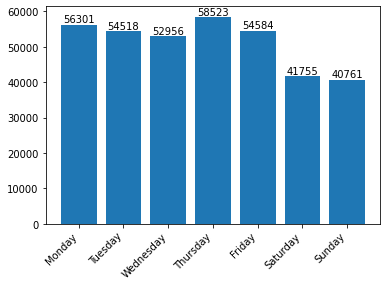

In [443]:
fig, ax = plt.subplots()
ax.bar(dow_pivot['dow'], dow_pivot['uid'], align='center')
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xticks(range(len(days_of_week)))
ax.set_xticklabels(days_of_week, rotation=45, ha='right')

for i, val in enumerate(dow_pivot['uid']):
    ax.annotate(f'{val}', (dow_pivot['dow'][i], val), ha='center', va='bottom')

Kita mencoba melihat pengguna setiap harinya berdasarkan *dayofweek* dimana 0 adalah hari Senin, dan 6 adalah hari Minggu. Ternyata, pengguna produk paling banyak terdapat di hari Kamis, sedangkan paling sedikit adalah di saat akhir minggu, yaitu hari Sabtu dan Minggu.

#### Jumlah Sesi Per Hari

In [444]:
df_visits.head(10)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,dow
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,2
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,5
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,6
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,2
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-01-01,2017-09-01,2017-08-31,2017-09-03,6
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-01,2018-01-01,2018-01-25,2018-01-30,1
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017-01-01,2017-11-01,2017-11-02,2017-11-05,6
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017-01-01,2017-07-01,2017-07-13,2017-07-19,2
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017-01-01,2017-11-01,2017-11-02,2017-11-08,2


In [445]:
sessions_per_user = df_visits.groupby('session_date').agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sess_per_user'] = (sessions_per_user['n_sessions'] / sessions_per_user['n_users'])

In [446]:
sessions_per_user.head(10)

,n_sessions,n_users,sess_per_user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
2017-06-06,875,797,1.097867
2017-06-07,788,699,1.127325
2017-06-08,939,868,1.081797
2017-06-09,755,695,1.086331


In [447]:
sessions_per_user['n_users'].describe()

count     364.000000
mean      907.991758
std       370.513838
min         1.000000
25%       594.000000
50%       921.000000
75%      1173.000000
max      3319.000000
Name: n_users, dtype: float64

In [448]:
sessions_per_user['n_sessions'].describe()

count     364.000000
mean      987.357143
std       418.985399
min         1.000000
25%       635.500000
50%      1003.000000
75%      1280.000000
max      4042.000000
Name: n_sessions, dtype: float64

In [449]:
sessions_per_user[sessions_per_user['n_sessions']==4042]

,n_sessions,n_users,sess_per_user
session_date,,,
2017-11-24,4042,3319,1.217837


In [450]:
sessions_per_user[sessions_per_user['n_sessions']==1]

,n_sessions,n_users,sess_per_user
session_date,,,
2018-03-31,1,1,1.0


In [451]:
sessions_per_user['sess_per_user'].describe()

count    364.000000
mean       1.082166
std        0.020873
min        1.000000
25%        1.070321
50%        1.082488
75%        1.093876
max        1.217837
Name: sess_per_user, dtype: float64

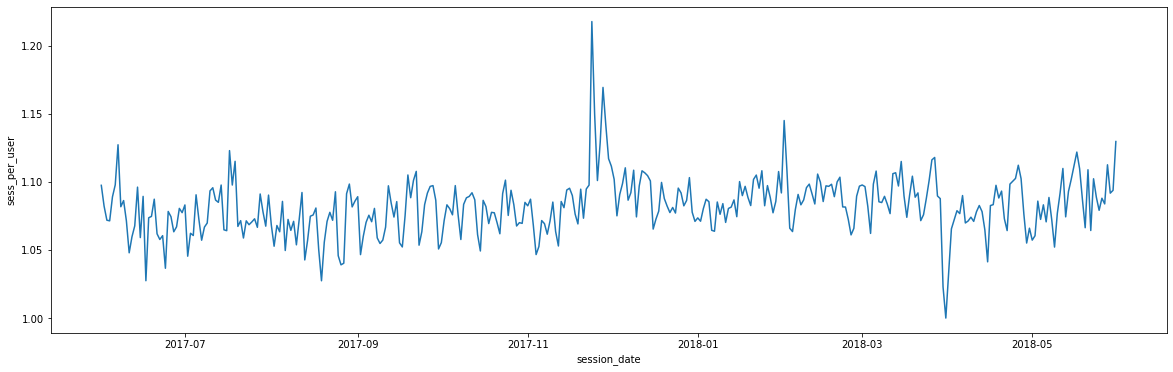

In [452]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=sessions_per_user['sess_per_user'])
plt.xlabel('session_date')
plt.ylabel('sess_per_user')

plt.show()

Berdasarkan tabel dan grafik visualisasi di atas, secara rata-rata, ternyata setiap pengguna menghabiskan paling banyak 1 sesi per hari untuk menggunakan produk, dan mencapai jumlah sesi paling banyak di sekitar akhir tahun 2017, yaitu di bulan November, dimana terdapat sekitar 4000 sesi. Sedangkan jumlah sesi paling sedikit ada di sekitar bulan Maret 2018 dimana hanya ada satu sesi saja dari satu pengguna.

#### Lama Durasi untuk Setiap Sesi

In [453]:
df_visits['session_duration_sec'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.seconds
df_visits['session_duration_sec'].mean()

643.0422873805642

In [454]:
df_visits['session_duration_sec'].median()

300.0

In [455]:
df_visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,dow,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,2,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,0,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,5,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,6,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,2,0


<AxesSubplot:>

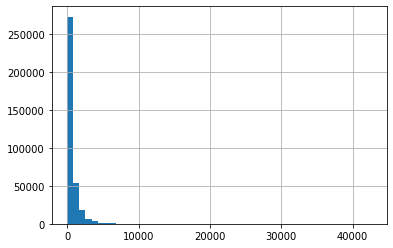

In [456]:
df_visits['session_duration_sec'].hist(bins=50) 

Sepertinya, rata-rata pengguna menghabiskan waktu 643 detik untuk menggunakan produk. Namun, melihat distribusinya yang tidak normal, sebaiknya kita menghitung modusnya.

In [457]:
df_visits['session_duration_sec'].mode()

0    60
dtype: int64

Setelah dihitung, rata-rata pengguna menghabiskan waktu sekitar 643 detik (atau sekitar 10 menit) untuk menggunakan produk di setiap sesinya, dan paling sering menggunakan produk dalam waktu 60 detik (1 menit).

#### Seberapa Sering Pengguna Kembali Menggunakan Produk

In [458]:
first_visit = df_visits.groupby('uid')['start_ts'].min().reset_index()

In [459]:
first_visit.head()

,uid,start_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [460]:
first_visit.columns = ['uid', 'first_start_ts']

In [461]:
first_visit.head()

,uid,first_start_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [462]:
first_visit['first_session_month'] = first_visit['first_start_ts'].astype('datetime64[M]')
first_visit['first_session_week'] = first_visit['first_start_ts'].astype('datetime64[W]')
first_visit['first_session_date'] = first_visit['first_start_ts'].dt.date

In [463]:
df_visits['session_date'] = df_visits['start_ts'].dt.date

In [464]:
first_visit.head()

,uid,first_start_ts,first_session_month,first_session_week,first_session_date
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-01,2018-02-01,2018-02-06
2,297729379853735,2017-06-07 18:47:00,2017-06-01,2017-06-01,2017-06-07
3,313578113262317,2017-09-18 22:49:00,2017-09-01,2017-09-14,2017-09-18
4,325320750514679,2017-09-30 14:29:00,2017-09-01,2017-09-28,2017-09-30


In [465]:
new_df_visits = pd.merge(df_visits, first_visit, on = 'uid')

In [466]:
new_df_visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,dow,session_duration_sec,first_start_ts,first_session_month,first_session_week,first_session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,2,1080,2017-12-20 17:20:00,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,0,1680,2018-02-19 16:53:00,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,5,0,2017-07-01 01:54:00,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,6,1440,2018-03-09 20:05:00,2018-03-01,2018-03-08,2018-03-09
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-01-01,2018-03-01,2018-03-08,2018-03-09,4,1680,2018-03-09 20:05:00,2018-03-01,2018-03-08,2018-03-09


In [467]:
new_df_visits['time_days'] = (new_df_visits['session_date'] - new_df_visits['first_session_date']).dt.days

In [468]:
new_df_visits['time_month'] = round(new_df_visits['time_days'] / 30).astype('int')

In [469]:
new_df_visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,dow,session_duration_sec,first_start_ts,first_session_month,first_session_week,first_session_date,time_days,time_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,2,1080,2017-12-20 17:20:00,2017-12-01,2017-12-14,2017-12-20,0,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,0,1680,2018-02-19 16:53:00,2018-02-01,2018-02-15,2018-02-19,0,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,5,0,2017-07-01 01:54:00,2017-07-01,2017-06-29,2017-07-01,0,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,6,1440,2018-03-09 20:05:00,2018-03-01,2018-03-08,2018-03-09,72,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-01-01,2018-03-01,2018-03-08,2018-03-09,4,1680,2018-03-09 20:05:00,2018-03-01,2018-03-08,2018-03-09,0,0


In [470]:
cohort_grouped = new_df_visits.pivot_table(index = 'first_session_month',
                                          columns = 'time_month',
                                          values = 'uid',
                                          aggfunc = 'nunique')

In [471]:
cohort_grouped.fillna('')

time_month,0,1,2,3,4,5,6,7,8,9,10,11,12
first_session_month,,,,,,,,,,,,,
2017-06-01,13259.0,955.0,720.0,775.0,944.0,847.0,875.0,713.0,746.0,659.0,576.0,513.0,272.0
2017-07-01,13140.0,716.0,688.0,675.0,767.0,609.0,606.0,619.0,527.0,379.0,337.0,113.0,
2017-08-01,10181.0,691.0,634.0,577.0,547.0,412.0,438.0,340.0,299.0,243.0,58.0,,
2017-09-01,16704.0,1239.0,1117.0,816.0,683.0,642.0,571.0,420.0,366.0,61.0,,,
2017-10-01,25977.0,1858.0,1384.0,960.0,975.0,787.0,565.0,478.0,120.0,,,,
2017-11-01,27248.0,1849.0,1270.0,1016.0,900.0,639.0,520.0,107.0,,,,,
2017-12-01,25268.0,1257.0,1057.0,719.0,577.0,400.0,101.0,,,,,,
2018-01-01,22624.0,1191.0,830.0,557.0,421.0,47.0,,,,,,,
2018-02-01,22197.0,1039.0,602.0,407.0,67.0,,,,,,,,


In [472]:
cohort_grouped_percent = (cohort_grouped.div(cohort_grouped[0], axis=0) * 100).round(2)

In [473]:
cohort_grouped_percent.fillna('')

time_month,0,1,2,3,4,5,6,7,8,9,10,11,12
first_session_month,,,,,,,,,,,,,
2017-06-01,100.0,7.20,5.43,5.85,7.12,6.39,6.6,5.38,5.63,4.97,4.34,3.87,2.05
2017-07-01,100.0,5.45,5.24,5.14,5.84,4.63,4.61,4.71,4.01,2.88,2.56,0.86,
2017-08-01,100.0,6.79,6.23,5.67,5.37,4.05,4.3,3.34,2.94,2.39,0.57,,
2017-09-01,100.0,7.42,6.69,4.89,4.09,3.84,3.42,2.51,2.19,0.37,,,
2017-10-01,100.0,7.15,5.33,3.7,3.75,3.03,2.18,1.84,0.46,,,,
2017-11-01,100.0,6.79,4.66,3.73,3.3,2.35,1.91,0.39,,,,,
2017-12-01,100.0,4.97,4.18,2.85,2.28,1.58,0.4,,,,,,
2018-01-01,100.0,5.26,3.67,2.46,1.86,0.21,,,,,,,
2018-02-01,100.0,4.68,2.71,1.83,0.3,,,,,,,,


In [474]:
cohort_grouped_percent[1].mean()

5.360833333333335

In [475]:
cohort_grouped_mean = cohort_grouped_percent.mean()
cohort_grouped_mean

time_month
0     100.000000
1       5.360833
2       4.295455
3       3.651000
4       3.767778
5       3.260000
6       3.345714
7       3.028333
8       3.046000
9       2.652500
10      2.490000
11      2.365000
12      2.050000
dtype: float64

Melalui tabel di atas, (abaikan index 0 pada `time_month`, karena artinya adalah bulan pertama dimana setiap pengguna di setiap cohort melakukan pendaftaran atau menggunakan produk pertama kali, sehingga pasti nilainya 100%), dapat kita lihat bahwa secara rata-rata, sebanyak 5% para pengguna akan kembali menggunakan produk di bulan berikutnya setelah penggunaan pertama, dan cenderung semakin menurun di bulan-bulan selanjutnya.

In [476]:
cohort_grouped_percent[1]

first_session_month
2017-06-01    7.20
2017-07-01    5.45
2017-08-01    6.79
2017-09-01    7.42
2017-10-01    7.15
2017-11-01    6.79
2017-12-01    4.97
2018-01-01    5.26
2018-02-01    4.68
2018-03-01    4.06
2018-04-01    3.91
2018-05-01    0.65
Name: 1, dtype: float64

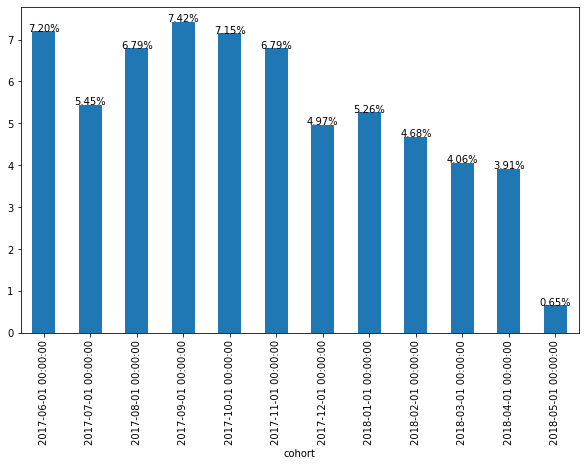

In [477]:
cohort_grouped_percent[1].plot(kind='bar', figsize=(10, 6))
for i, v in enumerate(cohort_grouped_percent[1].values):
    plt.text(i, v + 0.01,f"{v:.2f}%", ha='center')
plt.xlabel('cohort')
plt.show()

Setelah kita coba ambil contoh data 1 bulan setelah sesi atau kunjungan pertama, ternyata kohort bulan September memiliki persentase paling tinggi untuk jumlah pengguna yang kembali menggunakan produk atau melakukan kunjungan kembali, yaitu sebanyak 7.42%.


### Penghitungan Metrik Berdasarkan Penjualan

#### Kapan Orang-orang Mulai Melakukan Pembelian?

In [478]:
df_orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [479]:
first_order = df_orders.groupby('uid')['buy_ts'].min().reset_index()

In [480]:
first_order.columns = ['uid', 'first_buy_ts']

In [481]:
first_order['first_order_month'] = first_order['first_buy_ts'].astype('datetime64[M]')
first_order['first_order_week'] = first_order['first_buy_ts'].astype('datetime64[W]')
first_order['first_order_date'] = first_order['first_buy_ts'].dt.date

In [482]:
first_order.head()

,uid,first_buy_ts,first_order_month,first_order_week,first_order_date
0,313578113262317,2018-01-03 21:51:00,2018-01-01,2017-12-28,2018-01-03
1,1575281904278712,2017-06-03 10:13:00,2017-06-01,2017-06-01,2017-06-03
2,2429014661409475,2017-10-11 18:33:00,2017-10-01,2017-10-05,2017-10-11
3,2464366381792757,2018-01-28 15:54:00,2018-01-01,2018-01-25,2018-01-28
4,2551852515556206,2017-11-24 10:14:00,2017-11-01,2017-11-23,2017-11-24


In [483]:
new_df_orders = pd.merge(first_visit, first_order, on = 'uid')

In [484]:
new_df_orders.head()

,uid,first_start_ts,first_session_month,first_session_week,first_session_date,first_buy_ts,first_order_month,first_order_week,first_order_date
0,313578113262317,2017-09-18 22:49:00,2017-09-01,2017-09-14,2017-09-18,2018-01-03 21:51:00,2018-01-01,2017-12-28,2018-01-03
1,1575281904278712,2017-06-03 10:13:00,2017-06-01,2017-06-01,2017-06-03,2017-06-03 10:13:00,2017-06-01,2017-06-01,2017-06-03
2,2429014661409475,2017-10-11 17:14:00,2017-10-01,2017-10-05,2017-10-11,2017-10-11 18:33:00,2017-10-01,2017-10-05,2017-10-11
3,2464366381792757,2018-01-27 20:10:00,2018-01-01,2018-01-25,2018-01-27,2018-01-28 15:54:00,2018-01-01,2018-01-25,2018-01-28
4,2551852515556206,2017-11-24 10:14:00,2017-11-01,2017-11-23,2017-11-24,2017-11-24 10:14:00,2017-11-01,2017-11-23,2017-11-24


In [485]:
new_df_orders['first_order_date'] = pd.to_datetime(new_df_orders['first_order_date'])
new_df_orders['first_session_date'] = pd.to_datetime(new_df_orders['first_session_date'])

In [486]:
new_df_orders['days_first_buy'] = (new_df_orders['first_order_date'] - new_df_orders['first_session_date']).dt.days

In [487]:
new_df_orders.head()

,uid,first_start_ts,first_session_month,first_session_week,first_session_date,first_buy_ts,first_order_month,first_order_week,first_order_date,days_first_buy
0,313578113262317,2017-09-18 22:49:00,2017-09-01,2017-09-14,2017-09-18,2018-01-03 21:51:00,2018-01-01,2017-12-28,2018-01-03,107
1,1575281904278712,2017-06-03 10:13:00,2017-06-01,2017-06-01,2017-06-03,2017-06-03 10:13:00,2017-06-01,2017-06-01,2017-06-03,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-01,2017-10-05,2017-10-11,2017-10-11 18:33:00,2017-10-01,2017-10-05,2017-10-11,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-01,2018-01-25,2018-01-27,2018-01-28 15:54:00,2018-01-01,2018-01-25,2018-01-28,1
4,2551852515556206,2017-11-24 10:14:00,2017-11-01,2017-11-23,2017-11-24,2017-11-24 10:14:00,2017-11-01,2017-11-23,2017-11-24,0


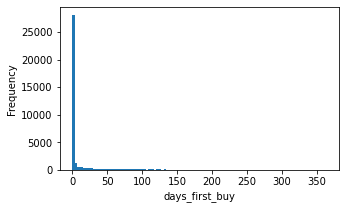

In [488]:
new_df_orders['days_first_buy'].plot(kind='hist', bins=100, figsize=(5, 3))
plt.xlabel('days_first_buy')
plt.show()

In [489]:
new_df_orders['days_first_buy'].value_counts()

0      25039
1       1966
2        685
3        452
4        386
       ...  
314        1
309        1
299        1
358        1
341        1
Name: days_first_buy, Length: 349, dtype: int64

Ternyata, kebanyakan pengguna melakukan pendaftaran dan pembelian pertama pada hari yang sama. Meskipun ada juga pengguna yang baru melakukan pembelian pertamanya setelah melewati hampir satu tahun setelah mereka mendaftar, namun jumlahnya tidak signifikan.

#### Jumlah Pesanan yang Dibuat Selama Periode Waktu Tertentu

In [490]:
df_orders['order_month'] = df_orders['buy_ts'].astype('datetime64[M]')
df_orders['order_week'] = df_orders['buy_ts'].astype('datetime64[W]')
df_orders['order_date'] = df_orders['buy_ts'].dt.date

In [491]:
df_orders.head()

,buy_ts,revenue,uid,order_month,order_week,order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01


In [492]:
df_orders['order_date'].min()

datetime.date(2017, 6, 1)

In [493]:
df_orders['order_date'].max()

datetime.date(2018, 6, 1)

Untuk melihat jumlah pesanan yang dibuat dalam periode tertentu, kita akan menentukan bahwa periode yang dimaksud adalah satu tahun, yaitu dari bulan Juni 2017 hingga Juni 2018, sesuai dengan tanggal minimum dan maksimum yang terdapat pada tabel `orders`.

In [494]:
df_agg = df_orders.groupby(['uid']).agg({'buy_ts' : 'count'})
df_agg

,buy_ts
uid,
313578113262317,1
1575281904278712,2
2429014661409475,1
2464366381792757,1
2551852515556206,2
...,...
18445147675727495770,1
18445407535914413204,3
18445601152732270159,1


In [495]:
df_agg.columns = ['total_orders']

In [496]:
df_agg.head()

,total_orders
uid,
313578113262317,1
1575281904278712,2
2429014661409475,1
2464366381792757,1
2551852515556206,2


In [497]:
df_agg.describe()

,total_orders
count,36523.000000
mean,1.380363
std,3.454461
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,239.000000


In [498]:
df_agg.value_counts()

total_orders
1               30231
2                4395
3                1086
4                 375
5                 147
                ...  
43                  1
39                  1
38                  1
28                  1
239                 1
Length: 62, dtype: int64

Rata-rata setiap pengguna melakukan paling banyak satu hingga dua pesanan dalam periode satu tahun. Tetapi ada juga kejadian unik dimana terdapat satu pengguna yang melakukan 239 pesanan dalam periode satu tahun. Sepertinya pengguna tersebut adalah pelanggan yang sangat loyal.

In [499]:
df_agg_month = df_orders.groupby(['order_month']).agg({'buy_ts' : 'count'})
df_agg_month.columns = ['total_orders']

In [500]:
df_agg_month

,total_orders
order_month,
2017-06-01,2354
2017-07-01,2363
2017-08-01,1807
2017-09-01,3387
2017-10-01,5679
2017-11-01,5659
2017-12-01,6218
2018-01-01,4721
2018-02-01,5281


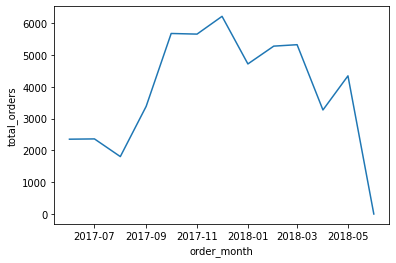

In [501]:
sns.lineplot(data=df_agg_month['total_orders'])
plt.xlabel('order_month')
plt.ylabel('total_orders')

plt.show()

Kita sudah mengetahui bahwa satu pengguna rata-rata melakukan satu hingga dua pesanan dalam periode satu tahun (Juni 2017 hingga Juni 2018). Setelah melihat total pesanan per bulannya, ternyata puncak banyaknya pembelian adalah di sekitar akhir tahun 2017, yaitu dari bulan Oktober hingga Desember. Hal ini mungkin terjadi karena momen akhir tahun sering digunakan orang-orang untuk melakukan pemesanan atau pembelian produk.

Namun, ternyata di bulan Juni 2018, jumlah pesanan menurun drastis karena hanya berjumlah satu saja. Apakah mungkin data yang kita miliki baru di awal bulan saja? Atau memang di bulan tersebut para pengguna sedang tidak ada keinginan untuk melakukan pesanan? 

#### Besaran Rata-rata Pembelian

In [502]:
df_agg_orders = df_orders.groupby(['uid']).agg({'revenue' : 'sum'})
df_agg_orders.head()

,revenue
uid,
313578113262317,0.55
1575281904278712,3.05
2429014661409475,73.33
2464366381792757,2.44
2551852515556206,10.99


In [503]:
df_agg_orders.columns = ['total_revenue']

In [504]:
df_agg_orders.head()

,total_revenue
uid,
313578113262317,0.55
1575281904278712,3.05
2429014661409475,73.33
2464366381792757,2.44
2551852515556206,10.99


In [505]:
df_agg_orders['total_revenue'].describe()

count    36523.000000
mean         6.901328
std         88.128535
min          0.000000
25%          1.470000
50%          3.050000
75%          5.800000
max      11810.180000
Name: total_revenue, dtype: float64

Besaran total rata-rata pembelian dalam periode satu tahun adalah sekitar $6.9. 

In [506]:
df_agg_orders_month = df_orders.groupby(['order_month']).agg({'revenue' : 'mean'})
df_agg_orders_month

,revenue
order_month,
2017-06-01,4.060106
2017-07-01,5.306589
2017-08-01,4.847139
2017-09-01,5.416448
2017-10-01,4.928280
2017-11-01,4.783518
2017-12-01,5.852139
2018-01-01,4.112927
2018-02-01,4.840095


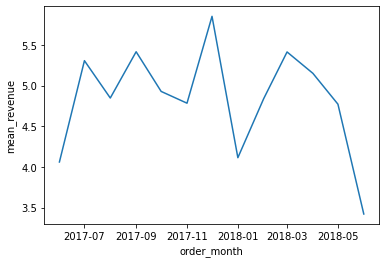

In [507]:
sns.lineplot(data=df_agg_orders_month['revenue'])
plt.xlabel('order_month')
plt.ylabel('mean_revenue')

plt.show()

Untuk rata-rata pembelian per bulan, dari grafik diatas, dapat kita simpulkan bahwa memang pada periode akhir tahun 2017, terjadi banyak pemesanan, sehingga rata-rata pendapatan perusahaan pun mendapatkan nilai yang paling tinggi saat itu, sebelum menurun tajam di bulan Januari 2018, dan kemudian meningkat lagi di bulan selanjutnya.

#### Jumlah LTV

In [508]:
new_df_orders.head()

,uid,first_start_ts,first_session_month,first_session_week,first_session_date,first_buy_ts,first_order_month,first_order_week,first_order_date,days_first_buy
0,313578113262317,2017-09-18 22:49:00,2017-09-01,2017-09-14,2017-09-18,2018-01-03 21:51:00,2018-01-01,2017-12-28,2018-01-03,107
1,1575281904278712,2017-06-03 10:13:00,2017-06-01,2017-06-01,2017-06-03,2017-06-03 10:13:00,2017-06-01,2017-06-01,2017-06-03,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-01,2017-10-05,2017-10-11,2017-10-11 18:33:00,2017-10-01,2017-10-05,2017-10-11,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-01,2018-01-25,2018-01-27,2018-01-28 15:54:00,2018-01-01,2018-01-25,2018-01-28,1
4,2551852515556206,2017-11-24 10:14:00,2017-11-01,2017-11-23,2017-11-24,2017-11-24 10:14:00,2017-11-01,2017-11-23,2017-11-24,0


In [509]:
cohort_sizes = (new_df_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index())

In [510]:
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [511]:
orders_group = pd.merge(df_orders, new_df_orders, on='uid')
cohorts = (orders_group.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index())

In [512]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

In [513]:
report['gp'] = report['revenue']
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [514]:
report['ltv'] = report['gp'] / report['n_buyers']
report

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531
...,...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,1114.87,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,10600.69,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1209.92,1,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,13925.76,0,4.660562


In [515]:
result = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).round(2)

In [516]:
result.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09-01,5.64,1.12,0.52,3.98,0.4,0.65,0.7,0.24,0.18,,,
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11-01,5.15,0.4,0.2,0.32,0.15,0.05,0.11,,,,,
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01-01,4.14,0.29,0.3,0.14,0.06,,,,,,,
2018-02-01,4.16,0.28,0.08,0.07,,,,,,,,


Kita akan mengambil contoh dari kohort pertama, yaitu kohort bulan Juni 2017.

In [517]:
ltv_201706 = result.loc['2017-06-01'].sum()
ltv_201706 

11.88

Secara rata-rata, setiap pelanggan dari kohort pertama berkontribusi atas pendapatan sebesar $11.88 selama satu tahun siklus hidup mereka.

In [518]:
m6_cum_ltv = result.cumsum(axis=1).mean(axis=0)[5]
m6_cum_ltv

7.970000000000001

Jika tim pemasaran ingin mengalokasikan jumlah anggaran untuk mendapatkan satu pelanggan agar biaya iklan dapat ditutupi dalam waktu enam bulan, maka biaya yang dianggarkan untuk menarik satu pelanggan tersebut tidak boleh melebihi $7.97.

### Penghitungan Metrik Berdasarkan Pemasaran

#### Jumlah Uang yang Dihabiskan

In [519]:
df_costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [520]:
df_costs['costs'].sum()

329131.62

Jumlah uang yang dihabiskan secara keseluruhan adalah $329131.

In [521]:
costs_per_id = df_costs.groupby('source_id').sum()['costs']
costs_per_id

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

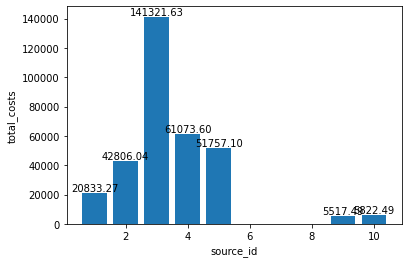

In [522]:
plt.bar(costs_per_id.index, costs_per_id.values)
for i, val in enumerate(costs_per_id.values):
    plt.annotate(f"{val:.2f}", (costs_per_id.index[i], val), ha='center', va='bottom')
plt.xlabel('source_id')
plt.ylabel('total_costs')
plt.show()

Tabel dan grafik di atas menunjukkan jumlah uang yang dihabiskan per sumber, dimana paling terbesar adalah `source_id`(sumber iklan) nomor 3 dengan total $141321.

In [523]:
df_costs['cost_month'] = df_costs['dt'].astype('datetime64[M]')
df_costs

,source_id,dt,costs,cost_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


In [524]:
cost_pivot = df_costs.pivot_table(index='cost_month', values='costs', aggfunc='sum')
cost_pivot.sort_values(by='costs', ascending=False)

,costs
cost_month,
2017-12-01,38315.35
2017-11-01,37907.88
2017-10-01,36322.88
2018-01-01,33518.52
2018-02-01,32723.03
2018-03-01,30415.27
2017-09-01,24368.91
2018-04-01,22289.38
2018-05-01,22224.27


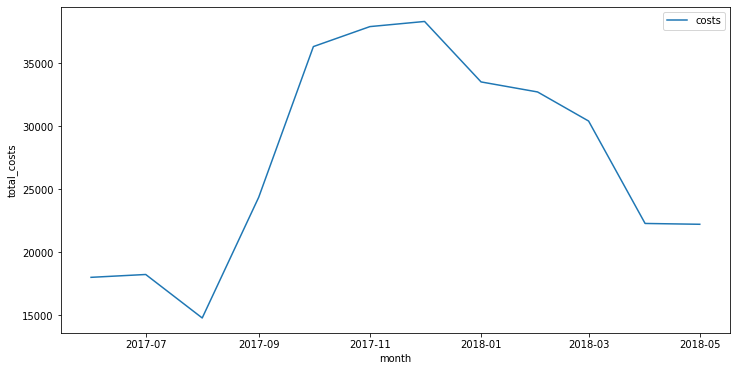

In [525]:
plt.figure(figsize=(12,6))
sns.lineplot(data=cost_pivot)
plt.xlabel('month')
plt.ylabel('total_costs')
plt.show()

Jumlah uang yang dihabiskan dari waktu ke waktu (dalam hal ini, waktu yang dimaksud adalah dari bulan ke bulan) ditampilkan dalam tabel dan grafik di atas. Dari visualisasi tersebut, dapat kita lihat jumlah uang terbanyak terjadi mendekati akhir tahun 2017, yaitu bulan Desember dan November 2017, sedangkan jumlah uang yang dihabiskan paling sedikit terjadi di bulan Agustus 2017. Mungkin tim pemasaran melakukan banyak promosi mendekati akhir tahun, sehingga biaya pengeluaran pun meningkat di waktu tersebut.

#### Biaya Akuisisi Pelanggan dari Masing-masing Sumber

In [526]:
#cac_per_month = report_cost.groupby('order_month')['cac'].sum().reset_index()
#cac_per_month

In [527]:
users = df_visits.groupby('source_id').agg({'uid':'count'}).reset_index()
users

,source_id,uid
0,1,34121
1,2,47626
2,3,85609
3,4,101794
4,5,66905
5,6,6
6,7,36
7,9,13276
8,10,10025


In [528]:
total_costs = df_costs.groupby('source_id').sum()['costs'].reset_index()
total_costs

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [529]:
total = users.merge(total_costs, on='source_id')
total

,source_id,uid,costs
0,1,34121,20833.27
1,2,47626,42806.04
2,3,85609,141321.63
3,4,101794,61073.60
4,5,66905,51757.10
5,9,13276,5517.49
6,10,10025,5822.49


In [530]:
total['cac'] = total['costs'] / total['uid']
total.sort_values(by='cac')

,source_id,uid,costs,cac
5,9,13276,5517.49,0.415599
6,10,10025,5822.49,0.580797
3,4,101794,61073.60,0.599972
0,1,34121,20833.27,0.610570
4,5,66905,51757.10,0.773591
1,2,47626,42806.04,0.898796
2,3,85609,141321.63,1.650780


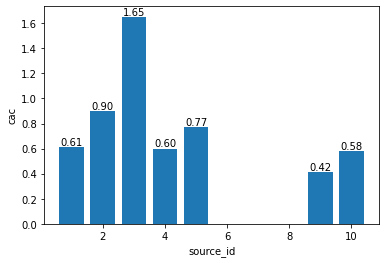

In [531]:
plt.bar(total['source_id'], total['cac'])

for i, val in enumerate(total['cac']):
    plt.annotate(f"{val:.2f}", (total['source_id'][i], val), ha='center', va='bottom')

plt.xlabel('source_id')
plt.ylabel('cac')
plt.show()

Tabel dan grafik di atas menunjukkan biaya akuisisi pelanggan untuk masing-masing sumber. Jika kita perhatikan, sumber iklan nomor 9 dan 10 mempunyai nilai CAC (*customer acquisition cost* atau biaya akuisisi pelanggan) yang paling kecil dan ternyata biaya pengeluaran (*costs*) nya pun paling minim, sedangkan sumber iklan no 3 memiliki biaya dan nilai CAC paling tinggi. Dari data ini kita dapat mengambil kesimpulan: biaya untuk sumber iklan no 3 dapat kita alokasikan ke sumber no 9 dan 10, dengan biaya CAC yang minim, peluang untuk mendapat pelanggan baru dari sumber tersebut diharapkan dapat meningkat. Dengan semakin meningkat jumlah pengguna baru, maka diharapkan jumlah pembelian pun akan semakin meningkat.

Selain itu, nilai CAC 0(nol) didapatkan untuk sumber iklan nomor 6,7 dan 8. Pada tabel users di atas, kita sempat melihat bahwa terdapat pelanggan yang sangat sedikit dari sumber iklan nomor 6 dan 7, sedangkan nomor 8 tidak ada sama sekali. Kemungkinan besar sumber-sumber tersebut tidak populer bagi para pengguna dan perusahaan tidak mengeluarkan biaya (*costs*) untuk ketiga sumber ini, sehingga kita tidak bisa mendapatkan nilai CAC dari ketiga sumber tersebut.

#### ROI

In [532]:
monthly_costs = df_costs.groupby(['cost_month']).sum()
monthly_costs

,source_id,costs
cost_month,,
2017-06-01,1020,18015.00
2017-07-01,1054,18240.59
2017-08-01,1054,14790.54
2017-09-01,1020,24368.91
2017-10-01,1054,36322.88
2017-11-01,1020,37907.88
2017-12-01,1054,38315.35
2018-01-01,1054,33518.52
2018-02-01,952,32723.03


In [533]:
report.head()

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531


In [534]:
report_cost = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='cost_month')
report_cost['cac'] = report_cost['costs'] / report_cost['n_buyers']
report_cost

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,source_id,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,1020,18015.00,8.905091
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329,1020,18015.00,8.905091
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637,1020,18015.00,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671,1020,18015.00,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531,1020,18015.00,8.905091
...,...,...,...,...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05,1063.05,1,0.300892,1025,30415.27,8.608907
74,2018-03-01,3533,2018-05-01,1114.87,1114.87,2,0.315559,1025,30415.27,8.608907
75,2018-04-01,2276,2018-04-01,10600.69,10600.69,0,4.657597,986,22289.38,9.793225
76,2018-04-01,2276,2018-05-01,1209.92,1209.92,1,0.531599,986,22289.38,9.793225


In [535]:
report_cost['roi'] = report_cost['ltv'] / report_cost['cac']
output = report_cost.pivot_table(
    index='first_order_month', columns='age', values='roi', aggfunc='mean')

output.cumsum(axis=1).round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10-01,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11-01,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12-01,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02-01,0.46,0.49,0.5,0.51,,,,,,,,


Dari tabel kohort di atas, dapat kita lihat untuk kohort pertama (kohort Juni 2017), perusahaan baru mendapatkan keuntungan di sekitar bulan ke-8. Namun pada kohort empat (kohort September 2017), perusahaan telah mendapatkan keuntungan di bulan ke-4.

Jika kita ingat grafik yang menggambarkan seberapa sering pengguna kembali, kita mendapatkan kesimpulan bahwa kohort bulan September memiliki persentase paling tinggi untuk jumlah pengguna yang kembali pada periode 1 bulan setelah kunjungan pertama mereka, yaitu sebanyak 7.42%. Mungkin hal ini yang menyebabkan perusahaan lebih cepat mendapat keuntungan dari kohort tersebut dibandingkan kohort pertama.

In [536]:
output.cumsum(axis=1).mean(axis=0) 

age
0     0.540816
1     0.581985
2     0.631069
3     0.719740
4     0.782946
5     0.859876
6     0.896819
7     0.969951
8     1.053871
9     0.964488
10    1.094658
11    1.333982
dtype: float64

Secara rata-rata, kohort biasanya baru berhasil menutupi biaya pemasaran menjelang akhir bulan ke-9. Namun, pada bulan ke-10 terdapat penurunan, dan perusahaan mulai kembali mendapat keuntungan di bulan ke-11. Hal ini tampak wajar, karena keuntungan sebuah perusahaan mungkin saja dapat mengalami penurunan setelah sempat mengalami kenaikan, yang lebih penting adalah keuntungan dapat kembali meningkat dan tidak semakin menurun. 

## Kesimpulan Umum

Kita telah mencoba untuk mengolah dan menganalisis data yang kita miliki.

Kumpulan data yang kita miliki terbagi dalam tiga dataset, yaitu:

1. Data mengenai kunjungan disimpan pada file `/datasets/visits_log_us.csv`
2. Data mengenai pesanan disimpan pada file `/datasets/orders_log_us.csv`
3. Data mengenai pengeluaran disimpan pada file `/datasets/costs_us.csv`

Dari tahap pra-pemrosesan data, kita telah mendapatkan kesimpulan:

1. Terdapat beberapa kesalahan pada dataset yang kita miliki, seperti kesalahan gaya penulisan dan juga tipe data di beberapa kolom. Kesalahan - kesalahan tersebut sudah diperbaiki. Masing - masing kolom dan tabel tersebut adalah:
    - semua nama kolom pada tabel `visits` dan `orders` sudah diperbaiki gaya penulisannya menggunakan huruf kecil dan nama kolom yang terdiri dari dua kata sudah menggunakan *underscore*.
    - kolom `end_ts` dan `start_ts` pada tabel `visits` sudah diperbaiki tipe datanya.
    - kolom `buy_ts` pada tabel `orders` sudah diperbaiki tipe datanya dari object menjadi datetime.
    - kolom `dt` pada tabel `costs` sudah diperbaiki tipe datanya dari object menjadi datetime.
        
2. Terdapat data anomali atau yang tidak sesuai pada tabel `visits` dimana waktu mulai sesi lebih lama dibandingkan waktu berakhirnya. Karena jumlahnya hanya sedikit, data ini telah dihapus.

3. Tidak terdapat nilai yang hilang dan data duplikat pada ketiga dataset yang kita miliki.

Setelah kita memperbaiki masalah yang terdapat pada dataset, selanjutnya kita akan menganalisis data dengan melakukan beberapa langkah, yaitu:

1. Melakukan penghitungan metrik berdasarkan produk dengan cara menghitung jumlah orang yang menggunakan produk setiap hari, minggu, dan bulan, jumlah sesi per harinya dan lama durasi untuk setiap sesi, dan seberapa sering pengguna kembali menggunakan produk.
Dari penghitungan tersebut, kita mendapatkan kesimpulan bahwa:

    - Rata-rata jumlah pengguna yang menggunakan produk setiap hari ada 907 orang. Dimana hari Kamis adalah hari dimana pengguna paling banyak menggunakan produk dan hari Sabtu dan Minggu adalah hari paling sedikit pengguna menggunakan produk.
    - Rata-rata jumlah pengguna yang menggunakan produk setiap minggu ada 5621 orang.
    - Rata-rata jumlah pengguna yang menggunakan produk setiap bulan ada 23228 orang.

    - Setiap pengguna menghabiskan rata-rata paling banyak 1 sesi per hari untuk menggunakan produk, dan mencapai jumlah sesi paling banyak di sekitar akhir tahun 2017, yaitu di bulan November, dimana terdapat sekitar 4000 sesi. Sedangkan jumlah sesi paling sedikit ada di sekitar bulan Maret 2018 dimana hanya ada satu sesi saja dari satu pengguna.

    - Lama durasi untuk setiap sesi adalah sekitar 643 detik (atau sekitar 10 menit), dan para pengguna paling sering menggunakan produk dalam waktu 60 detik (1 menit).

    - Secara rata-rata, sebanyak 5% para pengguna akan kembali menggunakan produk di bulan berikutnya setelah penggunaan pertama, dan cenderung semakin menurun di bulan-bulan selanjutnya. Setelah kita coba ambil contoh data 1 bulan setelah sesi atau kunjungan pertama, ternyata kohort bulan September memiliki persentase paling tinggi untuk jumlah pengguna yang kembali menggunakan produk atau melakukan kunjungan kembali, yaitu sebanyak 7.42%.

2. Melakukan penghitungan metrik berdasarkan penjualan dengan cara melihat waktu orang-orang mulai melakukan pembelian, jumlah pesanan yang dibuat selama periode waktu tertentu, yaitu selama periode satu tahun dari Juni 2017 hingga 2018, dan besaran rata-rata pembelian, serta jumlah LTV (*lifetime value* atau nilai "siklus hidup" pelanggan).
Dari penghitungan tersebut, kita mendapatkan kesimpulan bahwa:

    - Kebanyakan pengguna melakukan pendaftaran dan pembelian pertama pada hari yang sama.
    
    - Rata-rata setiap pengguna melakukan paling banyak satu hingga dua pesanan dalam periode satu tahun.
    
    - Besaran total rata-rata pembelian dalam periode satu tahun adalah sekitar $6.9. Pada periode akhir tahun 2017, terjadi banyak pembelian, sehingga rata-rata pendapatan perusahaan pun mendapatkan nilai yang paling tinggi saat itu, sebelum menurun tajam di bulan Januari 2018, dan kemudian meningkat lagi di bulan selanjutnya.
    
    - Jumlah LTV untuk masing-masing kohort sudah divisualisasikan melalui tabel kohort. Melalui tabel tersebut, kita dapat memberikan saran kepada tim pemasaran bahwa jika tim pemasaran ingin mengalokasikan jumlah anggaran untuk mendapatkan satu pelanggan agar biaya iklan dapat ditutupi dalam waktu enam bulan, maka biaya yang dianggarkan untuk menarik satu pelanggan tersebut tidak boleh melebihi $7.97.
    
3. Melakukan penghitungan metrik berdasarkan pemasaran dengan cara menghitung uang yang dihabiskan oleh perusahaan, menghitung biaya akuisisi pelanggan dari masing-masing sumber, dan menghitung keuntungan atau ROI (*return of investment*).
Dari penghitungan tersebut, kita mendapatkan kesimpulan bahwa:
     
    - Jumlah uang yang dihabiskan secara keseluruhan adalah \$329131, dimana jumlah terbesar adalah untuk *source_id* atau sumber iklan nomor 3 dengan total \$141321, dan terjadi mendekati akhir tahun 2017, yaitu di bulan November dan Desember 2017. 
    
    - Sumber iklan nomor 9 dan 10 mempunyai nilai CAC (*customer acquisition cost* atau biaya akuisisi pelanggan) yang paling kecil dan ternyata biaya pengeluaran (*costs*) nya pun paling minim, sedangkan sumber iklan no 3 memiliki biaya dan nilai CAC paling tinggi. Dari data ini kita dapat mengambil kesimpulan: biaya untuk sumber iklan no 3 dapat kita alokasikan ke sumber no 9 dan 10, dengan biaya CAC yang minim, peluang untuk mendapat pelanggan baru dari sumber tersebut diharapkan dapat meningkat.
    
    - Secara rata-rata, kohort biasanya baru berhasil menutupi biaya pemasaran menjelang akhir bulan ke-9. Namun, pada bulan ke-10 terdapat penurunan, dan perusahaan mulai kembali mendapat keuntungan di bulan ke-11.
    
Dengan demikian, dapat disimpulkan bahwa tim pemasaran dapat mengoptimalkan biaya pemasaran dengan fokus menginvestasikan untuk sumber iklan nomor 9 dan 10, karena kedua sumber tersebut memiliki biaya CAC yang minim, dan diharapkan penggunanya akan semakin bertambah.

Kita juga dapat melakukan promosi di hari Senin dan Jumat, karena kedua hari tersebut merupakan hari yang cukup populer untuk pengguna menggunakan produk atau melakukan kunjungan, setelah hari Kamis yang memiliki jumlah kunjungan terbanyak.

Sebaiknya berinvestasi di bulan-bulan mendekati akhir tahun, karena pendapatan terbesar biasanya terjadi di sekitar bulan Oktober hingga Desember. Kita mengetahui secara rata-rata, biaya iklan/pemasaran baru berhasil ditutupi menjelang akhir bulan ke-9, namun, jika perusahaan ingin menutupi biaya iklan dalam waktu 6 bulan, maka biaya yang dianggarkan untuk menarik satu pelanggan diharapkan tidak boleh melebihi $7.97.


Diharapkan, dengan langkah-langkah tersebut, perusahaan bisa memperoleh keuntungan dengan lebih maksimal dan biaya pemasaran pun dapat lebih optimal.